<div style="color:Black; display:fill; border-radius:5px;font-size:200%;font-family:sans-serif;letter-spacing:0.5 px;text-align: center">
Iris Species Prediction
</div>

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
   - Iris Setosa
   - Iris Versicolour
   - Iris Virginica

## Load data with required library packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
#IRIS_Dataset.csv
df = pd.read_csv('iris_data.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Analyze and visualize the dataset

In [3]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# check null value
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class_labels    0
dtype: int64

In [5]:
# columns name
df.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Class_labels'],
      dtype='object')

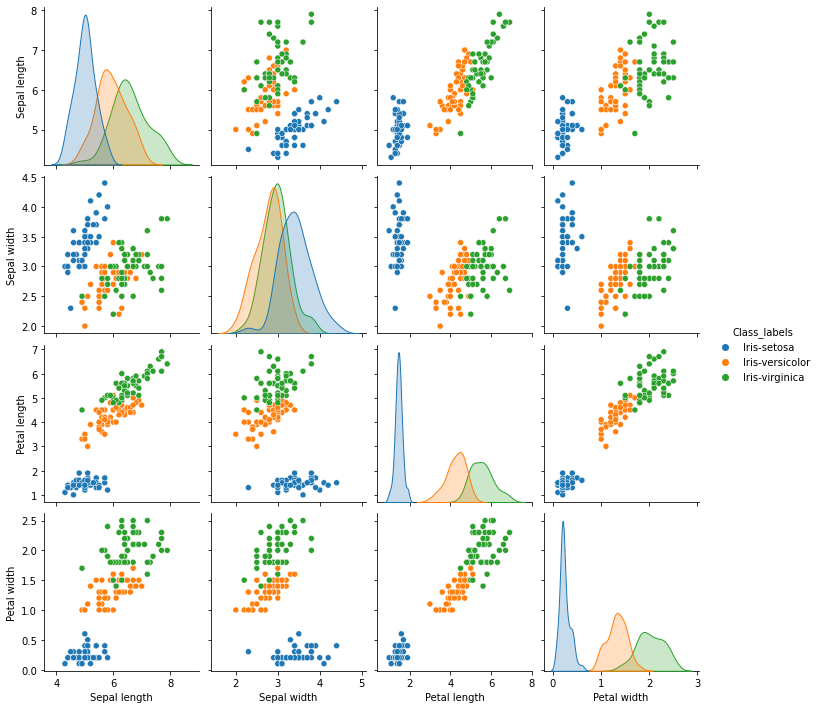

In [6]:
#visualization

sns.pairplot(df, hue="Class_labels")

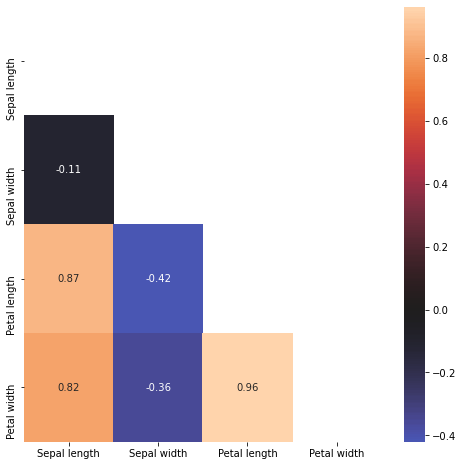

In [7]:
# correlations of all features
# Calculate pairwise-correlation
matrix = df.corr()
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(8, 8))
sns.heatmap(matrix, mask=mask, center=0, annot=True)
plt.show();

In [8]:
Count_Species= df['Class_labels'].value_counts()

In [9]:
Count_Species

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class_labels, dtype: int64

In [10]:
# Separate features and target  

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [11]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25


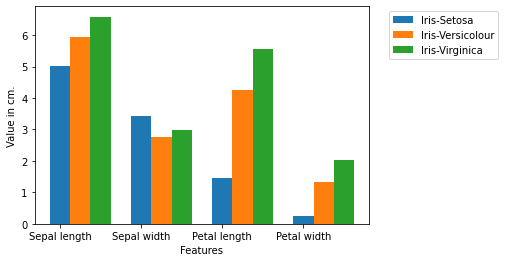

In [12]:
# Plot the average
#plt.figure(figsize=(20,8))
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Iris-Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Iris-Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Iris-Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

<div style="color:Black; display:fill;font-size:200%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Apply various Machine Learning Models and Evaluation of Accuracy.
</div>

In [13]:
# model list : name of Supervised ML Model
# score : every model accuracy store
score=[]
model_list=[]

## Model 1: Decision Tree Classifier

**Model training**

In [14]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [15]:
#calculate model building time
from time import time
from sklearn.metrics import confusion_matrix

In [16]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
t0 = time()
dt_clf.fit(X_train,y_train)
print(time() - t0)

0.008069515228271484


In [17]:
# Predict from the test dataset
predictions = dt_clf.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
model_list.append("Decision Tree Classifier")
accuracy=accuracy_score(y_test, predictions)
score.append(accuracy)
print("Accuracy of DT : " ,accuracy)


Accuracy of DT :  1.0


**Model Evaluation**

In [18]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        22

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

Confusion Matrix: 
 [[20  0  0]
 [ 0 18  0]
 [ 0  0 22]]


## Model 2: Random Forest Classifier

**Model training**

In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()      
t0 = time()
rf_clf.fit(X_train,y_train)
print(time() - t0)

1.3775629997253418


In [20]:
# Predict from the test dataset
predictions = rf_clf.predict(X_test)
model_list.append("Random Forest Classifier")
accuracy=accuracy_score(y_test, predictions)
score.append(accuracy)
print("Accuracy of RF : " ,accuracy)

Accuracy of RF :  1.0


**Model Evaluation**

In [21]:
# A detailed classification report
print(classification_report(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        22

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

Confusion Matrix: 
 [[20  0  0]
 [ 0 18  0]
 [ 0  0 22]]


## Model 3: K-Neighbors Classifier

**Model training**

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=8)
t0 = time()
kn_clf.fit(X_train,y_train)
print(time() - t0)

0.003996133804321289


In [23]:
# Predict from the test dataset
predictions = kn_clf.predict(X_test)
model_list.append("KNN Classifier")
accuracy=accuracy_score(y_test, predictions)
score.append(accuracy)
print("Accuracy of KNN : " ,accuracy)

Accuracy of KNN :  1.0


**Model Evaluation**

In [24]:
# A detailed classification report
print(classification_report(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        22

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

Confusion Matrix: 
 [[20  0  0]
 [ 0 18  0]
 [ 0  0 22]]


## Model 4: Logistic Regression

**Model training**

In [25]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
#X, y = make_classification(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#log_reg = make_pipeline(StandardScaler(), LogisticRegression())
#log_reg.fit(X_train, y_train)
t0=time()
log_reg.fit(X_train,y_train)
print(time()-t0)

0.1510000228881836


In [26]:
# Predict from the test dataset
predictions = log_reg.predict(X_test)
model_list.append("Logistic Regression")
accuracy=accuracy_score(y_test, predictions)
score.append(accuracy)
print("Accuracy of LR : " ,accuracy)

Accuracy of LR :  1.0


**Model Evaluation**

In [27]:
# A detailed classification report
print(classification_report(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        22

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

Confusion Matrix: 
 [[20  0  0]
 [ 0 18  0]
 [ 0  0 22]]


## Model 5: Support Vector Machine

**Model training**

In [28]:
# SVM
from sklearn.svm import SVC

svm_clf = SVC()
t0=time()
svm_clf.fit(X_train,y_train)
print(time()-t0)

0.010221481323242188


In [29]:
# Predict from the test dataset
predictions = svm_clf.predict(X_test)
model_list.append("Supprt Vector Machine")
accuracy=accuracy_score(y_test, predictions)
score.append(accuracy)
print("Accuracy of SVM : " ,accuracy)

Accuracy of SVM :  0.9833333333333333


**Model Evaluation**

In [30]:
# A detailed classification report
print(classification_report(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.95      0.98        22

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Confusion Matrix: 
 [[20  0  0]
 [ 0 18  0]
 [ 0  1 21]]


## Model 6: Gaussian Naive Bayes

**Model training**

In [31]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
t0 =time()
nb_clf.fit(X_train,y_train)
print(time()-t0)

0.002077341079711914


In [32]:
# Predict from the test dataset
predictions = nb_clf.predict(X_test)
model_list.append("Naive Bayes Classifier")
accuracy=accuracy_score(y_test, predictions)
score.append(accuracy)
print("Accuracy of NB : " ,accuracy)

Accuracy of NB :  0.9833333333333333


**Model Evaluation**

In [33]:
# A detailed classification report
print(classification_report(y_test, predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.95      0.98        22

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Confusion Matrix: 
 [[20  0  0]
 [ 0 18  0]
 [ 0  1 21]]


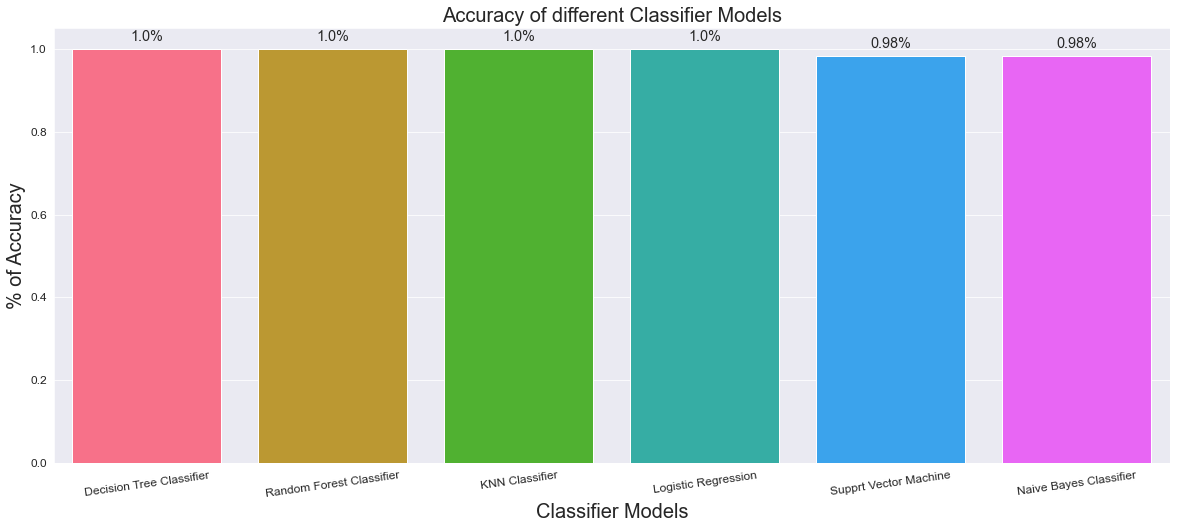

In [34]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Testing the model

In [35]:
# below the listed all trained model name.if you selected any model
# and predeict user input.
all_model_name=[dt_clf,rf_clf,kn_clf,log_reg,svm_clf,nb_clf]


In [36]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.9, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector

prediction =dt_clf.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [37]:
pickle.dump(dt_clf,open("dt_model.sav",'wb'))
pickle.dump(log_reg,open('log_model.sav','wb'))
pickle.dump(svm_clf,open('svc_model.sav','wb'))
pickle.dump(kn_clf,open('kn_model.sav','wb'))

In [38]:
models=pickle.load(open('dt_model.sav','rb'))

In [39]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.9, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector

prediction =models.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
